In [56]:
from numpy import *
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.utils_drawing import draw_several_fields

from scipy.special import j1
from numpy.fft import fft,ifft,fft2,ifft2,fftshift,ifftshift

## axicon + plane wave

example from Diffractio docs
https://diffractio.readthedocs.io/en/latest/source/examples/diffraction_objects.html?highlight=axicon

In [71]:
%%time
num_pixels = 512

length = 250 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.axicon(r0=(0 * um, 0 * um), radius=125 * um, angle=4*degrees, refraction_index=1.5)
u2 = u1 * t1

Wall time: 264 ms


Wall time: 4.67 sor 35.76


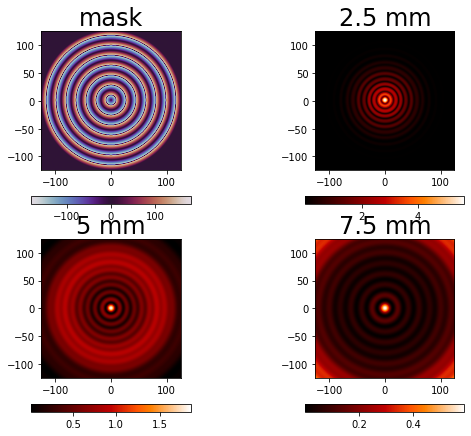

In [72]:
%%time
u3 = u2.RS(z=2.5 * mm, new_field=True, verbose=True)

u4 = u2.RS(z=5 * mm, new_field=True, verbose=True)

u5 = u2.RS(z=7.5 * mm, new_field=True, verbose=True)

draw_several_fields((u2, u3, u4, u5), titles=('mask', '2.5 mm', '5 mm', '7.5 mm'), logarithm=True,
                    kinds=['phase', 'intensity', 'intensity', 'intensity'])

Wall time: 2.47 s


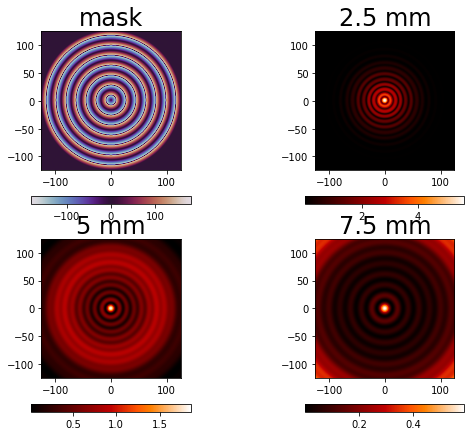

In [63]:
%%time
u3 = u2.CZT(z=2.5 * mm, xout=x0, yout=y0)

u4 = u2.CZT(z=5 * mm, xout=x0, yout=y0)

u5 = u2.CZT(z=7.5 * mm, xout=x0, yout=y0)

draw_several_fields((u2, u3, u4, u5), titles=('mask', '2.5 mm', '5 mm', '7.5 mm'), logarithm=True,
                    kinds=['phase', 'intensity', 'intensity', 'intensity'])

In [84]:
%%time
N = 2**13
diameter = 4*mm

x0 = np.linspace(-diameter / 2, diameter / 2, N)
y0 = np.linspace(-diameter / 2, diameter / 2, N)

wavelength = 0.659 * um
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.axicon(r0=(0 * um, 0 * um), radius=diameter/2, angle=4*degrees, refraction_index=1.5)
u2 = u1 * t1

Wall time: 45.2 s


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x766fa6d0>)

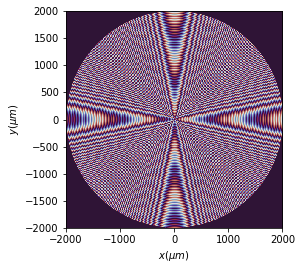

In [85]:
u2.draw('phase')

- Needs denser sampling: factor 0.64

Wall time: 4min 41s 1.35


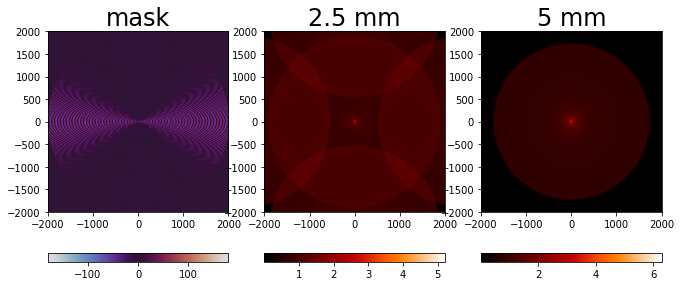

In [78]:
%%time
u3 = u2.RS(z=2.5 * mm, new_field=True, verbose=True)

# u4 = u2.RS(z=5 * mm, new_field=True, verbose=True)

u5 = u2.RS(z=7.5 * mm, new_field=True, verbose=True)

draw_several_fields((u2, 
                     u3, 
#                      u4, 
                     u5
                    ), titles=('mask', '2.5 mm', '5 mm', '7.5 mm'), logarithm=True,
                    kinds=['phase', 'intensity', 'intensity', 'intensity'])

Wall time: 4min 54s


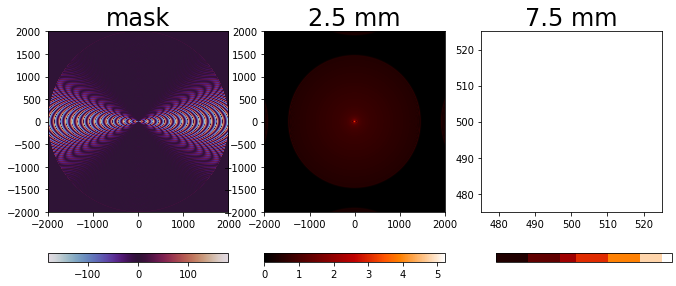

In [87]:
%%time
xout = yout = linspace(500,500,128)
# u3 = u2.CZT(z=2.5 * mm, xout=x0, yout=y0)

# u4 = u2.CZT(z=5 * mm, xout=x0, yout=y0)

# u5 = u2.CZT(z=7.5 * mm, xout=x0, yout=y0)

u3 = u2.CZT(z=2.5 * mm, xout=xout, yout=yout)

u5 = u2.CZT(z=7.5 * mm, xout=xout, yout=yout)

draw_several_fields((u2, u3, u5), 
                    titles=('mask', '2.5 mm', '7.5 mm'), logarithm=True,
                    kinds=['phase', 'intensity', 'intensity'])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x716f3f10>)

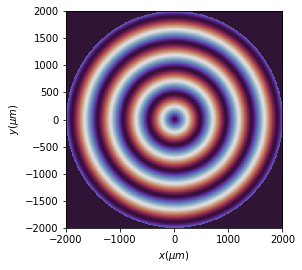

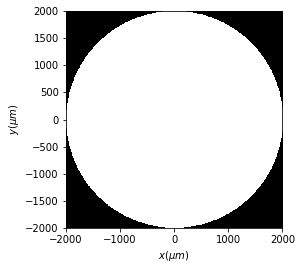

In [44]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.axicon(r0=(0 * um, 0 * um),
            radius=diameter / 2,
            refraction_index=1.4563, # fused silica at 659 nm 
            angle=(pi/2-alpha)*degrees # angle from the transverse plane
         )

t0.draw('phase')

u1 = u0 * t0
u1.draw('intensity')

Wall time: 1min 27s


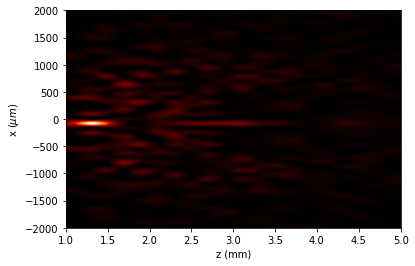

In [53]:
%%time
zpts = linspace(1,5,20)*mm
xpts = linspace(-diameter/2,diameter/2,51)
u2_czt = u1.CZT(z=zpts, xout=xpts, yout=0)
u2_czt.draw(z_scale='mm')

In [51]:
u1.CZT?

## axicon + Gaussian beam
reproduce results from "Generating Bessel-Gaussian Beams with Controlled Axial Intensity Distribution"

In [141]:
N = 2**12
w0 = 1*mm # Gaussian beam waist
diameter = 5*w0 # > 4*w0 => negligible clipping

x0 = np.linspace(-diameter / 2, diameter / 2, N)
y0 = np.linspace(-diameter / 2, diameter / 2, N)
wavelength = 0.6596 * um

alpha = 80*degrees # axicon angle from the axis
n = 1.4563
beta = arcsin(n*cos(alpha))+alpha-pi/2
NA = sin(beta)
print("NA = ", NA)
print("input resolution = ", diameter/N, "um")

NA =  0.08103793762818333
input resolution =  1.220703125 um


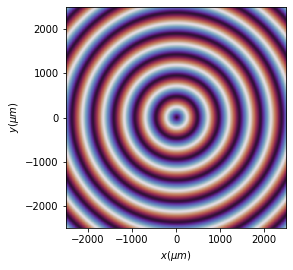

In [142]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0,0), w0=(w0,w0), z0=(0,0))

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.axicon(r0=(0 * um, 0 * um),
            radius=diameter, # ~ infinite axicon
            refraction_index=1.4563, # fused silica at 659 nm 
            angle=(pi/2-alpha)*degrees # angle from the transverse plane
         )

t0.draw('phase')

u1 = u0 * t0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x75e20df0>)

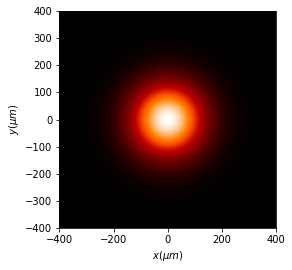

In [104]:
u1.draw('intensity')

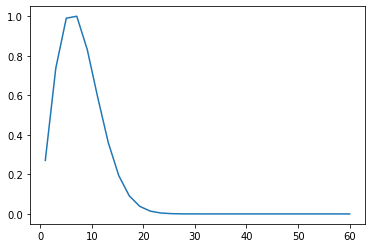

In [143]:
# analytical form of Intensity
# alpha = 80*degrees # axicon angle from the axis
# n = 1.45
# beta = arcsin(n*cos(alpha))+alpha-pi/2
# NA = sin(beta)
hw = w0 #2*mm
zB = hw/tan(beta)
P = 1 # laser power
Iaxial = lambda z: (8*P*sin(beta)/(wavelength*hw))*(z/zB)*exp(-2*(z/zB)**2)
zpts = linspace(1,60,30)*mm
Ipts = Iaxial(zpts)
Ipts/=max(Ipts)
plt.plot(zpts/mm,Ipts)

Wall time: 9min 15s


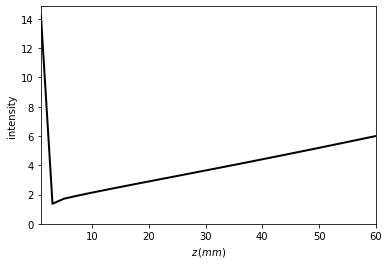

In [144]:
%%time
u2_czt = u1.CZT(z=zpts, xout=0, yout=0)
u2_czt.draw(z_scale='mm')

Wall time: 1min 10s


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x776379d0>)

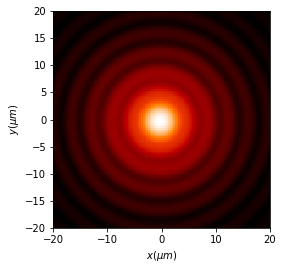

In [125]:
%%time
xout=np.linspace(-20,20,128)
yout=np.linspace(-20,20,128)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout)

u2_czt.draw(logarithm=1e-2)

In [ ]:
%%time - todo
# ASM

# define k space grid and field
dfx = 1/((N+2*padding)*dx) # the k space resolution over 2*pi
fx_list = arange(-(padding+N//2),(padding+N//2),1)*dfx
kx_list = 2*pi*fx_list
ky_list = -kx_list
KX, KY = meshgrid(kx_list, ky_list)
KZ_real = real(sqrt(k**2 - KX**2 - KY**2 + 0j))
KZ_imag = imag(sqrt(k**2 - KX**2 - KY**2 + 0j))
KZ = KZ_real + 1j*abs(KZ_imag)
u1_kspace = fftshift(fft2(pad(u1.u, padding))) # k space from zero-padded input array

# propagate
phase = f*KZ_real % 2*pi
u2_kspace = u1_kspace*exp(1j*phase)

# transform back to real space - only the field withing the original array size is valid
u2 = ifft2(u2_kspace)
u2 = u2[padding-1:padding-1+N,padding-1:padding-1+N] # get rid of the zero padding

int_asm = real(conjugate(u2)*u2)
int_asm /= amax(int_asm)

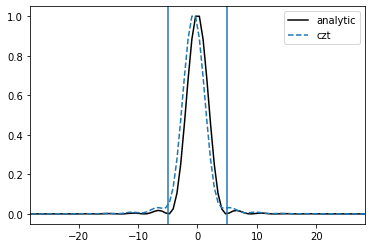

In [134]:
# analytical result
a = diameter/2
k = 2*np.pi/wavelength
f = focal
int_func = lambda x: (j1(a*x*k/f)/x)**2
int_analytic = int_func(xout)
int_analytic /= max(int_analytic)
# czt result
int_czt = abs(u2_czt.u[len(xout)//2])**2
norm = max(int_czt)
int_czt /= norm
int_rs = abs(u2_rs.u[len(xout)//2])**2
norm = max(int_rs)
int_rs /= norm
plt.plot(xout,int_analytic,label='analytic',c='k')
plt.plot(xout,int_czt,'--',label='czt')
# plt.scatter(xout,int_rs,label='rs',c='limegreen')
plt.axvline(1.22*wavelength/(2*NA))
plt.axvline(-1.22*wavelength/(2*NA))
plt.xlim((-7*wavelength/(2*NA),7*wavelength/(2*NA)))
plt.legend()

### high NA 
fails to produce diffraction limited spot size for input grid size up to 4096 wide, but both RS, CZT, and ASM remain in agreement

In [47]:
diameter = 1 * mm # lens diameter
f = sqrt(3)*(diameter/2)
# ASM validity condition, if input is zero-padded with N zeros each direction 
lmbda = 1 * um
z = f
NA = sin(arctan((diameter/(2*f))))

dx = 0.505*lmbda
N = 2**(int(log2(diameter/dx))+1) # number of points is the nearest power of 2 which gives a wide enough grid
# N*=2 # try higher sampling
width = N*dx
print(f"N={N}, dx={dx} um, width={width} um")
if dx > lmbda/(2*NA):
    print("warning: ASM sampling is valid but diffracted limited features may not be resolved")

# this expression (I think assumes zero padding width doubles N to 2N)
assert z <= (2*N**2*dx/lmbda)*sqrt(1-(lmbda/(2*dx))**2), "z too short for ASM to be valid"

x0 = linspace(-width / 2, width / 2, N)
y0 = x0
k = 2*pi/lmbda

padding = 5*N//2 # how many rows/cols of zeroes to pad with. should be half-int. multi. of N

# for the output resampling
xmin = -10*um
xmax = -xmin
ymin = xmin
ymax = xmax
samples=256

print("NA = ",NA)

N=2048, dx=0.505 um, width=1034.24 um
NA =  0.5


In [63]:
2**11

2048

In [58]:
lmbda*f/diameter, dx

(0.8660254037844386, 0.51)

In [48]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=lmbda)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=lmbda)
t0.lens(r0=(0 * um, 0 * um),
        radius=(diameter / 2, diameter / 2),
        focal=(f, f))

# t0.draw('phase')

u1 = u0 * t0

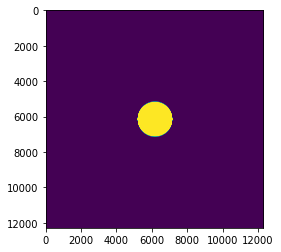

In [49]:
plt.imshow(abs(pad(u1.u, padding)))

In [15]:
padding

2048

In [50]:
%%time
# ASM

# define k space grid and field
dfx = 1/((N+2*padding)*dx) # the k space resolution over 2*pi
fx_list = arange(-(padding+N//2),(padding+N//2),1)*dfx
kx_list = 2*pi*fx_list
ky_list = -kx_list
KX, KY = meshgrid(kx_list, ky_list)
KZ_real = real(sqrt(k**2 - KX**2 - KY**2 + 0j))
KZ_imag = imag(sqrt(k**2 - KX**2 - KY**2 + 0j))
KZ = KZ_real + 1j*abs(KZ_imag)
u1_kspace = fftshift(fft2(pad(u1.u, padding))) # k space from zero-padded input array

# propagate
phase = f*KZ_real % 2*pi
u2_kspace = u1_kspace*exp(1j*phase)

# transform back to real space - only the field withing the original array size is valid
u2 = ifft2(u2_kspace)
u2 = u2[padding-1:padding-1+N,padding-1:padding-1+N] # get rid of the zero padding

int_asm = real(conjugate(u2)*u2)
int_asm /= amax(int_asm)

Wall time: 3min 50s


In [51]:
u1.u.shape, phase.shape, u1_kspace.shape, u2.shape

((2048, 2048), (12288, 12288), (12288, 12288), (2048, 2048))

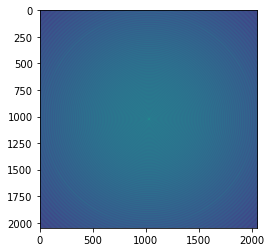

In [53]:
plt.imshow(int_asm)

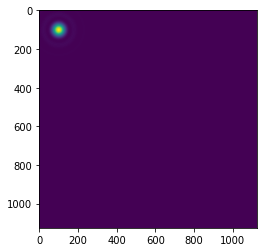

Text(0.5, 1.0, 'f=866.0254037844386')

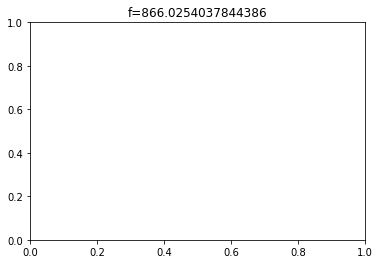

In [80]:
plt.imshow(int_asm[N//2-1-100:N//2-1+N-100,N//2-1-100:N//2-1+N-100])
plt.show()
plt.title(f"f={f+dz}")

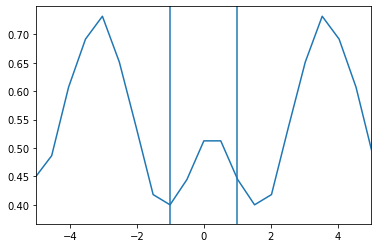

In [18]:
w = 200
# plt.imshow(int_asm[N//2 - w:N//2 + w, N//2 - w:N//2 + w])
# plt.show()
xx = arange(-w,w,1)*dx # what is the resolution of my output plane?
a = diameter/2
k = 2*np.pi/lmbda
int_func = lambda x: (j1(a*x*k/f)/x)**2
xresamp = linspace(-5,5,100)
int_analytic = int_func(xresamp)
plt.plot(xx,int_asm[N//2, N//2 - w:N//2 + w])
# plt.plot(xresamp,int_analytic/max(int_analytic))
plt.axvline(-lmbda/(2*NA))
plt.axvline(lmbda/(2*NA))
plt.xlim(-5,5)
plt.show()

In [130]:
2*padding

4096

In [133]:
2*log2(N+2*padding)

25.169925001442312

In [122]:
N/(N+2*padding)

0.3333333333333333

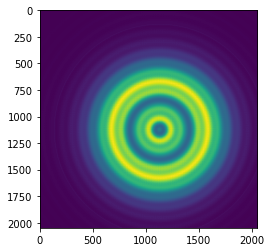

In [75]:
plt.imshow(int_asm[padding-100:padding+N-100,padding-100:padding+N-100])

In [80]:
u2.shape

(4096, 4096)

Wall time: 12.1 s


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x752c68e0>)

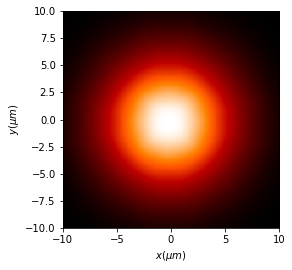

In [53]:
%%time
xout = linspace(xmin,xmax,samples)

u2_asm = Scalar_source_XY(x=arange(-width,width,dx), y=arange(-width,width,dx), wavelength=lmbda)
u2_asm.u = u2
u2_asm.cut_resample(x_limits=(xmin, xmax),
                   y_limits=(ymin, ymax),
                   num_points=(samples,samples),
                   new_field=False,
                   interp_kind=(3, 1))
u2_asm.draw(logarithm=False)

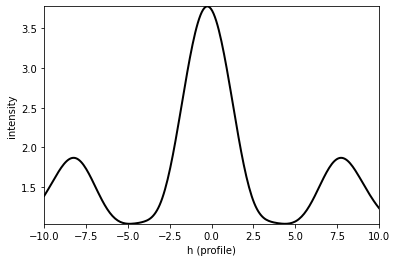

In [51]:
u2_asm.draw_profile(point1=(xmin,0),point2=(xmax,0))
plt.show()
# plt.plot(xout, )

Wall time: 5min 51s 2.86


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x2474f9f9a00>)

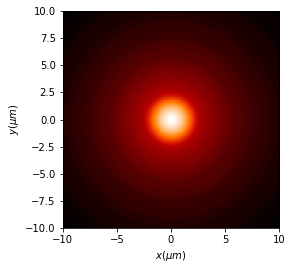

In [7]:
%%time

# RS
u2_rs = u1.RS(z=focal, verbose=True)

u2_rs.cut_resample(x_limits=(xmin, xmax),
                   y_limits=(ymin, ymax),
                   num_points=(samples,samples),
                   new_field=False,
                   interp_kind=(3, 1))
u2_rs.draw(logarithm=False)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x24751296e50>)

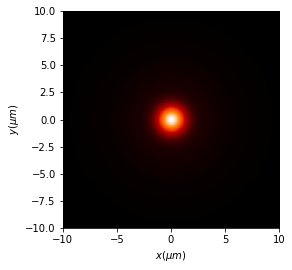

In [29]:
u2_rs.draw(logarithm=False)

num x, num y, num z = 512, 512, 1
Wall time: 424 ms


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x21181c3ea90>)

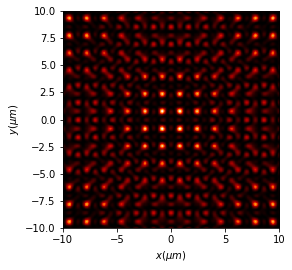

In [22]:
%%time
xout=np.linspace(xmin,xmax,samples)
yout=np.linspace(ymin,ymax,samples)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout,
               verbose=True)

u2_czt.draw(logarithm=False) #logarithm=1e-2)

num x, num y, num z = 512, 512, 1
Wall time: 17.7 s


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x2474ff99e20>)

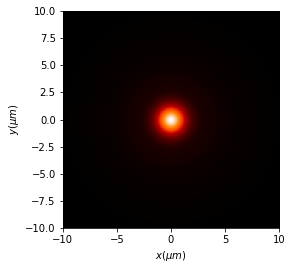

In [12]:
%%time
xout=np.linspace(xmin,xmax,samples)
yout=np.linspace(ymin,ymax,samples)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout,
               verbose=True)

u2_czt.draw(logarithm=False) #logarithm=1e-2)

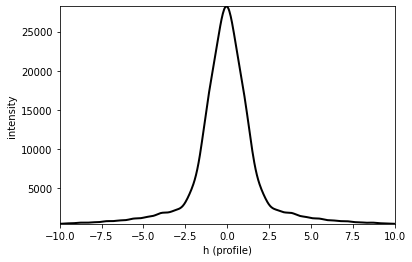

In [189]:
u2_czt.draw_profile(point1=(xmin,0),point2=(xmax,0))
plt.show()

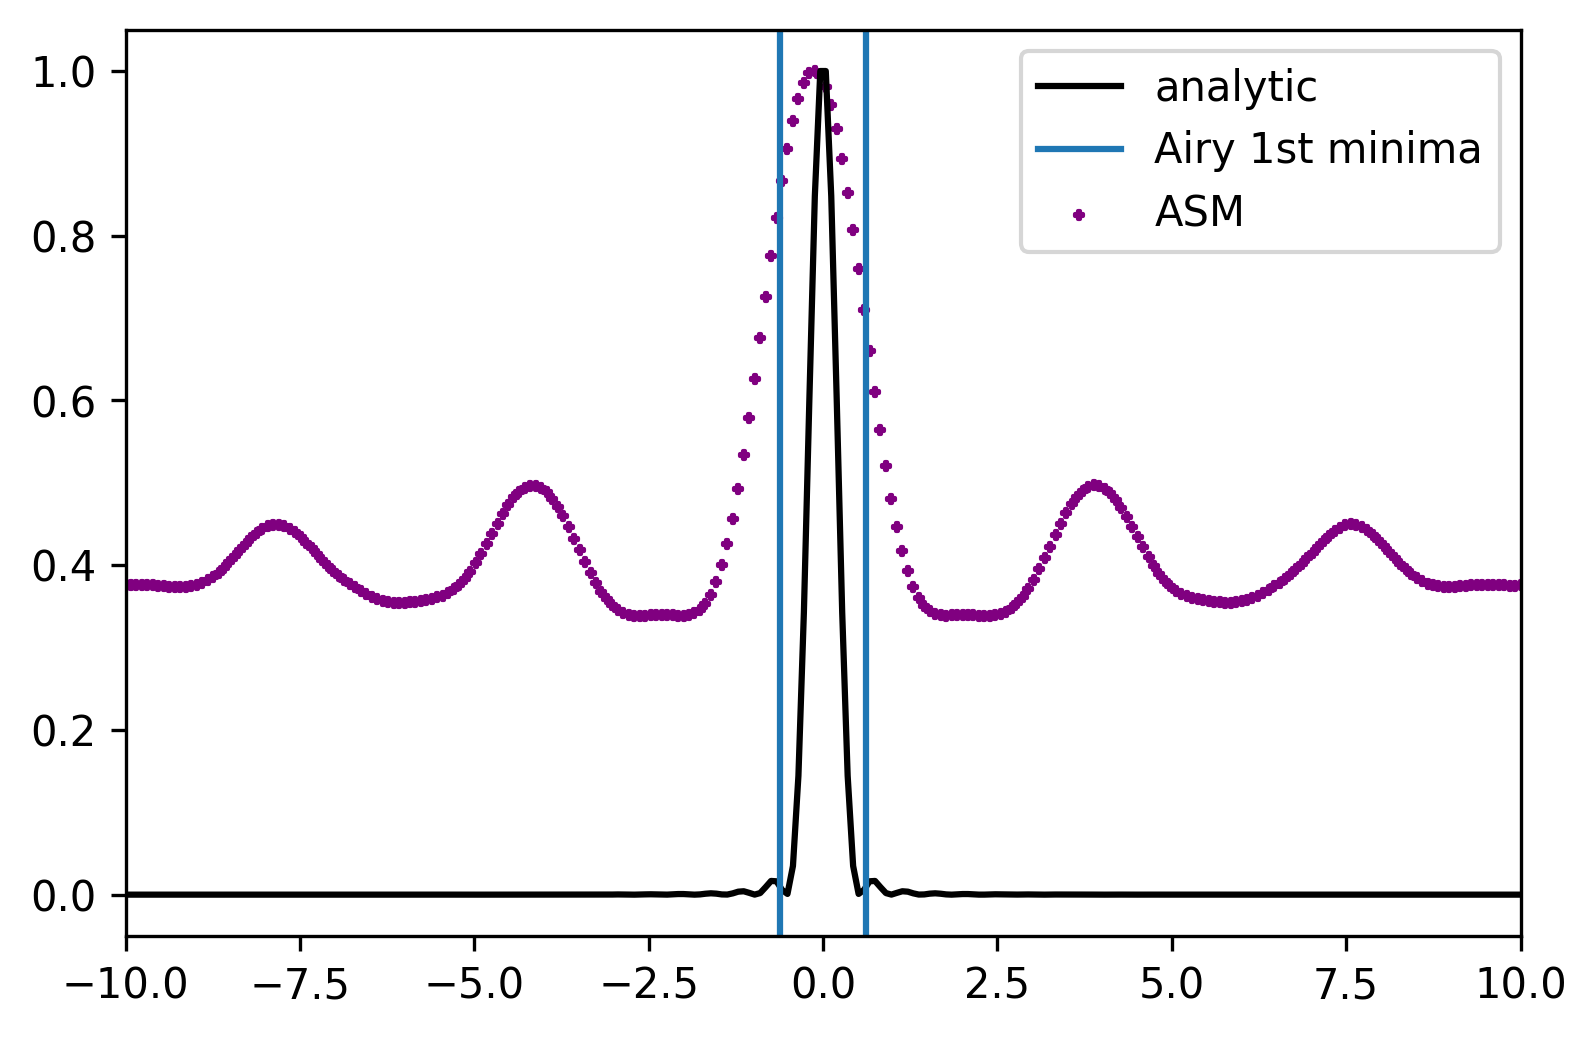

In [41]:
include = ['asm'] #'rs','czt','asm'] # remove ones you don't want

# xout = x0

# analytical result
a = diameter/2
k = 2*np.pi/lmbda
int_func = lambda x: (j1(a*x*k/f)/x)**2
int_analytic = int_func(xout)
int_analytic /= max(int_analytic)

fig,ax = plt.subplots(dpi=300)
ax.plot(xout,int_analytic,label='analytic',c='k')

if 'czt' in include:
    int_czt = abs(u2_czt.u[len(xout)//2])**2
    norm = max(int_czt)
    int_czt /= norm
    ax.plot(xout,int_czt,'--',label='CZT',c='orange')
    
if 'asm' in include:
    int_asm = abs(u2_asm.u[len(xout)//2])**2
    norm = max(int_asm)
    int_asm /= norm
    ax.scatter(xout,int_asm,label='ASM',c='purple',s=4,marker="P")

if 'rs' in include:
    int_rs = abs(u2_rs.u[len(xout)//2])**2
    norm = max(int_rs)
    int_rs /= norm
    ax.scatter(xout,int_rs,label='RS',c='limegreen',s=2)

ax.set_xlim((xout[0],xout[-1]))
# these diverge from the 1st Airy minima at high NA because the NA is outside the paraxial approximation
plt.axvline(-1.22*lmbda/(2*NA),label='Airy 1st minima')
plt.axvline(1.22*lmbda/(2*NA)) 
plt.legend()

In [110]:
1.22*0.78*um/0.6

1.586

In [127]:
dz_list

array([0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995, 1.   ])

In [141]:
%%time
profiles = []
xout=np.linspace(xmin,xmax,samples)
yout=np.linspace(ymin,ymax,samples)
dz_list = linspace(0.97,0.99,11) # units focal length
for dz_frac in dz_list:
    u2_czt = u1.CZT(z=dz_frac*focal, xout=xout, yout=yout,
                   verbose=True)
    print(dz_frac*focal/mm)
    profiles.append(u2_czt.u[len(xout)//2])
    
#     u2_czt.draw_profile(point1=(xmin,0),point2=(xmax,0))
#     plt.show()

num x, num y, num z = 512, 512, 1
1.6800892833418108
num x, num y, num z = 512, 512, 1
1.6835533849569486
num x, num y, num z = 512, 512, 1
1.6870174865720864
num x, num y, num z = 512, 512, 1
1.6904815881872242
num x, num y, num z = 512, 512, 1
1.6939456898023617
num x, num y, num z = 512, 512, 1
1.6974097914174997
num x, num y, num z = 512, 512, 1
1.7008738930326375
num x, num y, num z = 512, 512, 1
1.704337994647775
num x, num y, num z = 512, 512, 1
1.707802096262913
num x, num y, num z = 512, 512, 1
1.7112661978780506
num x, num y, num z = 512, 512, 1
1.7147302994931883
Wall time: 4min 10s


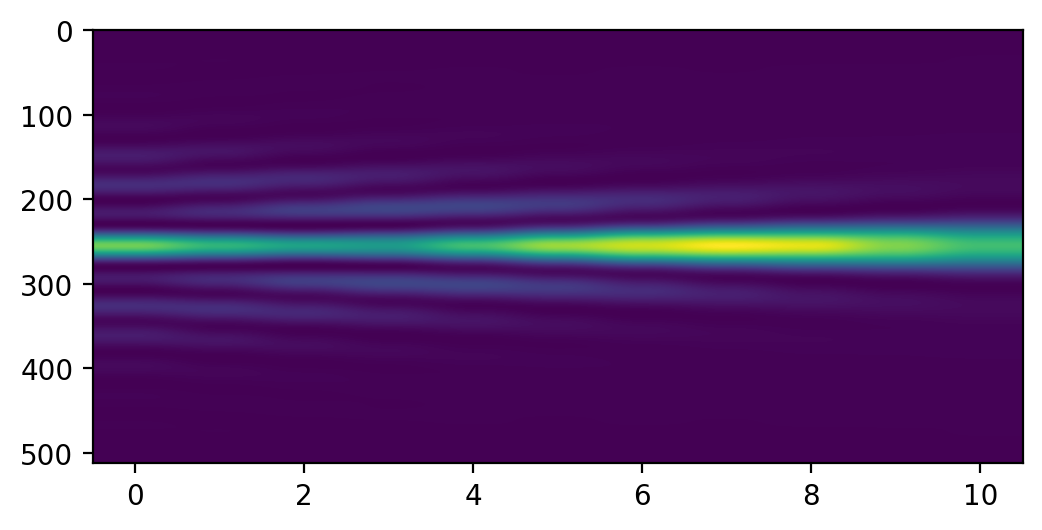

In [142]:
fig,ax = plt.subplots(dpi=200)
int_xz_czt=abs(np.array(profiles,dtype=complex).transpose())**2
ax.imshow(int_xz_czt)
ax.set_aspect(0.01)

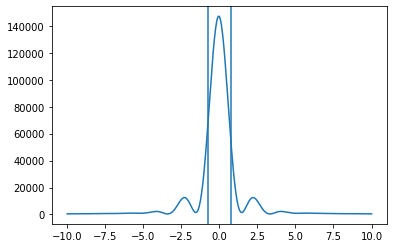

In [143]:
I0max = 0
imax = 0
int_max = zeros(len(xout))
for i,x in enumerate(profiles):
    intensity = abs(np.array(x,complex))**2
    _max = max(intensity)
    if _max > I0max:
        I0max = _max 
        imax = i
        int_max = intensity
plt.plot(xout,int_max)
plt.axvline(-1.22*wavelength/(2*NA))
plt.axvline(1.22*wavelength/(2*NA))

In [145]:
# there is evidently a focal shift from the expectation
dz_list[imax]*focal, focal, dz_list[imax]

(1704.337994647775, 1732.0508075688772, 0.984)

In [118]:
# depth of field for a given NA
(wavelength/(NA)**2)/um

2.4952

In [109]:
len(profiles[0])

512

In [110]:
len(xout)

512

### high NA - comparison with vector diffraction

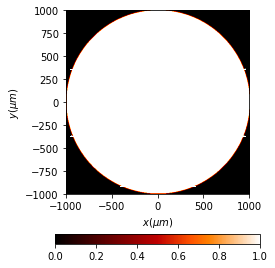

In [161]:
# u0 and t0 defined in the previous section
EM0 = Vector_source_XY(x=x0, y=y0, wavelength=wavelength)
EM0.constant_polarization(u0, v=(1, 0))

M1 = Vector_mask_XY(x0, y0, wavelength)
M1.polarizer_linear(azimuth=0 * degrees)
M1.apply_scalar_mask(t0)

# todo: multiply the field by the Fresnel
# equations for transmission. see 
# Leutenegger et. al.,"Fast focus field calculations"

EM1 = EM0 * M1
EM1.draw('ellipses', num_ellipses=(11,11))

In [171]:
plt.close?

Object `fig.close` not found.


In [184]:
EM2 = EM1.CZT(focal, xout, yout)

KeyboardInterrupt: 

In [185]:
EM2defocus = EM1.CZT(0.98*focal, xout, yout)

In [180]:
EM2z = EM1.CZT(linspace(0.95,1.05,11)*focal, 0, 0)

(<AxesSubplot:xlabel='z ($\\mu$m)', ylabel='$I_x$'>,
 <AxesSubplot:xlabel='z ($\\mu$m)', ylabel='$I_y$'>)

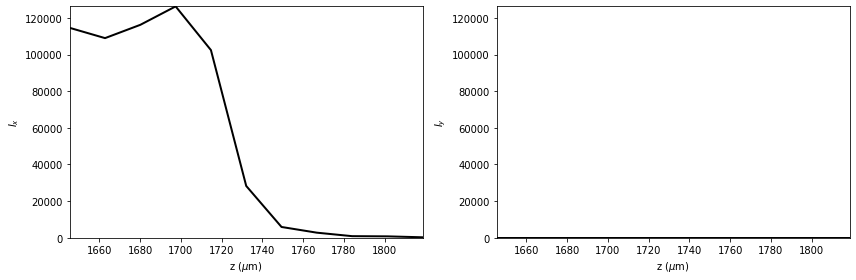

In [181]:
EM2z.draw('intensities')

In [182]:
1700/focal

0.9814954576223639

In [183]:
linspace(0.95,1.05,11)

array([0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05])

(<AxesSubplot:title={'center':'$I_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

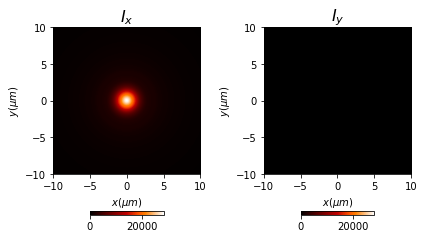

In [164]:
EM2.draw('intensities')

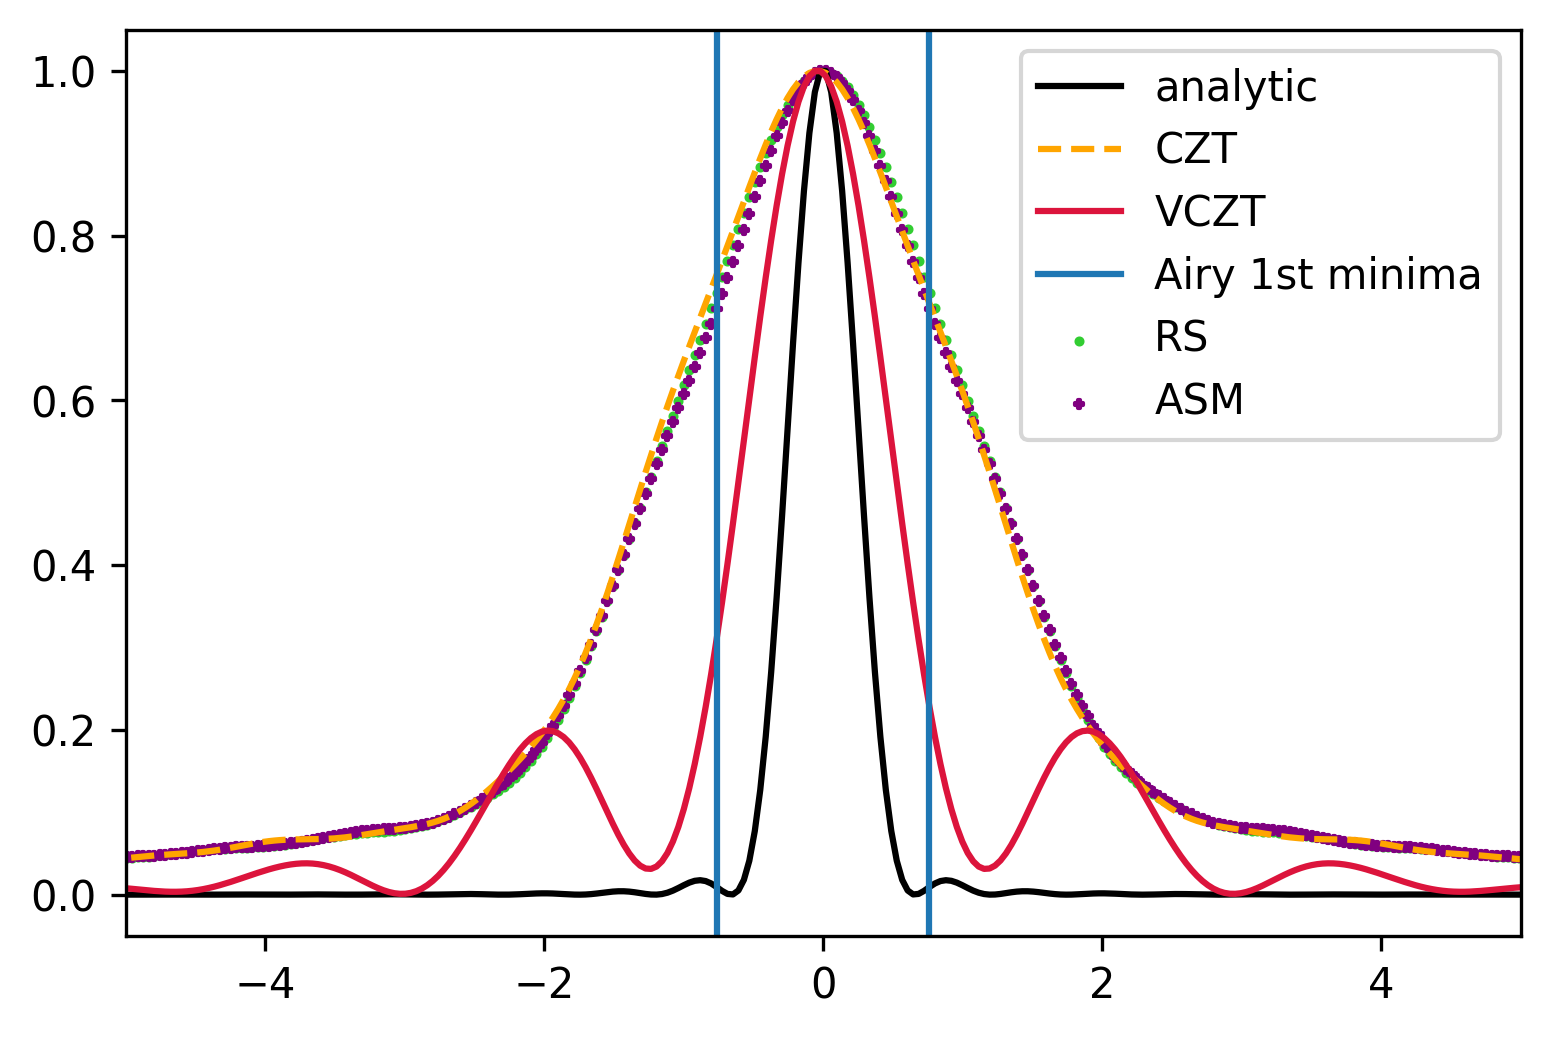

In [192]:
# analytical result
a = diameter/2
k = 2*np.pi/wavelength
f = focal
int_func = lambda x: (j1(a*x*k/f)/x)**2
int_analytic = int_func(xout)
int_analytic /= max(int_analytic)

int_czt = abs(u2_czt.u[len(xout)//2])**2
norm = max(int_czt)
int_czt /= norm

int_asm = abs(u2_asm.u[len(xout)//2])**2
norm = max(int_asm)
int_asm /= norm

int_rs = abs(u2_rs.u[len(xout)//2])**2
norm = max(int_rs)
int_rs /= norm

int_vczt = abs(EM2defocus.Ex[len(xout)//2])**2
norm = max(int_vczt)
int_vczt /= norm

fig,ax = plt.subplots(dpi=300)
ax.plot(xout,int_analytic,label='analytic',c='k')
ax.plot(xout,int_czt,'--',label='CZT',c='orange')
ax.scatter(xout,int_rs,label='RS',c='limegreen',s=2)
ax.scatter(xout,int_asm,label='ASM',c='purple',s=4,marker="P")
ax.plot(xout,int_vczt,label='VCZT',c='crimson')
ax.set_xlim((-5,5))
plt.axvline(-1.22*wavelength/(2*NA),label='Airy 1st minima')
plt.axvline(1.22*wavelength/(2*NA))
plt.legend()

In [176]:
del profiles

In [177]:
del EM0

In [178]:
del u0, t0

In [179]:
import gc
gc.collect()

31651